In [1]:
import pandas as pd
import os

# # Initialize an empty list to store data frames
# data_frames = []

# # Loop through the file names from 0.csv to 436.csv
# for i in range(467):
#     filename = f"{i}.csv"
#     if os.path.isfile(filename):  # Check if the file exists
#         df = pd.read_csv(filename)
#         data_frames.append(df)

# # Concatenate all the data frames into one data frame
# merged_df = pd.concat(data_frames, ignore_index=True)
weather_df = pd.read_csv("merged_data.csv")
weather_df

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,month,day,hour,HLY-TEMP-NORMAL,...,comp_flag_HLY-WIND-1STPCT,years_HLY-WIND-1STPCT,HLY-WIND-2NDDIR,meas_flag_HLY-WIND-2NDDIR,comp_flag_HLY-WIND-2NDDIR,years_HLY-WIND-2NDDIR,HLY-WIND-2NDPCT,meas_flag_HLY-WIND-2NDPCT,comp_flag_HLY-WIND-2NDPCT,years_HLY-WIND-2NDPCT
0,AQW00061705,"PAGO PAGO WSO AP, AS AQ",-14.3306,-170.7136,3.7,01-01T00:00:00,1,1,0,81.0,...,S,30,8.0,,S,30,19.0,,S,30
1,AQW00061705,"PAGO PAGO WSO AP, AS AQ",-14.3306,-170.7136,3.7,01-01T01:00:00,1,1,1,80.7,...,S,30,3.0,,S,30,17.4,,S,30
2,AQW00061705,"PAGO PAGO WSO AP, AS AQ",-14.3306,-170.7136,3.7,01-01T02:00:00,1,1,2,80.5,...,S,30,3.0,,S,30,19.4,,S,30
3,AQW00061705,"PAGO PAGO WSO AP, AS AQ",-14.3306,-170.7136,3.7,01-01T03:00:00,1,1,3,80.3,...,S,30,3.0,,S,30,19.3,,S,30
4,AQW00061705,"PAGO PAGO WSO AP, AS AQ",-14.3306,-170.7136,3.7,01-01T04:00:00,1,1,4,80.1,...,S,30,3.0,,S,30,19.3,,S,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3828115,USW00094236,"KLAMATH FALLS INTL AP, OR US",42.1469,-121.7242,1244.8,12-31T19:00:00,12,31,19,30.0,...,S,30,8.0,,S,30,11.3,,S,30
3828116,USW00094236,"KLAMATH FALLS INTL AP, OR US",42.1469,-121.7242,1244.8,12-31T20:00:00,12,31,20,29.2,...,S,30,4.0,,S,30,13.4,,S,30
3828117,USW00094236,"KLAMATH FALLS INTL AP, OR US",42.1469,-121.7242,1244.8,12-31T21:00:00,12,31,21,28.7,...,S,30,4.0,,S,30,13.3,,S,30
3828118,USW00094236,"KLAMATH FALLS INTL AP, OR US",42.1469,-121.7242,1244.8,12-31T22:00:00,12,31,22,28.2,...,S,30,4.0,,S,30,12.4,,S,30


In [11]:
grouped_df = weather_df.groupby('STATION').first().reset_index()[['STATION', 'LATITUDE', 'LONGITUDE']]
print(grouped_df)

         STATION  LATITUDE  LONGITUDE
0    AQW00061705  -14.3306  -170.7136
1    FMW00040308    9.4833   138.0833
2    FMW00040505    7.4500   151.8333
3    GQW00041414   13.5833   144.9167
4    GQW00041415   13.4836   144.7961
..           ...       ...        ...
432  USW00094032   43.7331  -103.6114
433  USW00094176   47.6831  -117.3214
434  USW00094185   43.5950  -118.9564
435  USW00094224   46.1569  -123.8825
436  USW00094236   42.1469  -121.7242

[437 rows x 3 columns]


In [12]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

# Initialize the geocoder
geolocator = Nominatim(user_agent="geoapiExercises")

# Function to get the state from latitude and longitude
def get_state(lat, lon):
    try:
        location = geolocator.reverse((lat, lon), language='en')
        if location and 'address' in location.raw:
            return location.raw['address'].get('state', None)
    except GeocoderTimedOut:  # Handle timeout specifically
        return None
    except Exception as e:  # Catch other geocoding errors
        print(f"Error with lat={lat}, lon={lon}: {e}")
        return None

# Add a State column
grouped_df['State'] = grouped_df.apply(lambda row: get_state(row['LATITUDE'], row['LONGITUDE']), axis=1)

print(grouped_df)



         STATION  LATITUDE  LONGITUDE           State
0    AQW00061705  -14.3306  -170.7136  American Samoa
1    FMW00040308    9.4833   138.0833             Yap
2    FMW00040505    7.4500   151.8333           Chuuk
3    GQW00041414   13.5833   144.9167            Guam
4    GQW00041415   13.4836   144.7961            Guam
..           ...       ...        ...             ...
432  USW00094032   43.7331  -103.6114    South Dakota
433  USW00094176   47.6831  -117.3214      Washington
434  USW00094185   43.5950  -118.9564          Oregon
435  USW00094224   46.1569  -123.8825          Oregon
436  USW00094236   42.1469  -121.7242          Oregon

[437 rows x 4 columns]


In [3]:
import pandas as pd
import os

# import glob

# # Define the file path pattern for the CSV files
# file_path_pattern = "Unemployment/*UR.csv"  # Adjust the path to where your files are located

# # Combine all files, standardizing the column name for Unemployment Rate
# all_data = pd.concat(
#     (
#         pd.read_csv(file)
#         .rename(columns={file.split('/')[-1][:4]: 'UnemploymentRate'})  # Rename the unique column
#         .assign(State=file.split('/')[-1][:2])  # Add the state abbreviation
#         for file in glob.glob(file_path_pattern)
#     ),
#     ignore_index=True
# )

# # Save the combined DataFrame to a CSV file or inspect
# all_data.to_csv("combined_data.csv", index=False)
# print(all_data.head())

ur_df = pd.read_csv("combined_data.csv")
ur_df['State'].nunique()
ur_df



,DATE,UnemploymentRate,State
0,1976-01-01,5.8,TX
1,1976-02-01,5.8,TX
2,1976-03-01,5.9,TX
3,1976-04-01,5.9,TX
4,1976-05-01,5.9,TX
...,...,...,...
29245,2024-05-01,2.9,WY
29246,2024-06-01,2.9,WY
29247,2024-07-01,2.9,WY
29248,2024-08-01,3.0,WY


First few rows of the dataset:
            UnemploymentRate State  month  year
DATE                                           
1976-01-01               5.8    TX      1  1976
1976-02-01               5.8    TX      2  1976
1976-03-01               5.9    TX      3  1976
1976-04-01               5.9    TX      4  1976
1976-05-01               5.9    TX      5  1976

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29250 entries, 1976-01-01 to 2024-09-01
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UnemploymentRate  29250 non-null  float64
 1   State             29250 non-null  object 
 2   month             29250 non-null  int32  
 3   year              29250 non-null  int32  
dtypes: float64(1), int32(2), object(1)
memory usage: 914.1+ KB
None

Missing values in the dataset:
UnemploymentRate    0
State               0
month               0
year                0
dtype: int64

/var/folders/8d/zp1knlxn3392rbxm30xm7_dm0000gn/T/ipykernel_78133/432820513.py:29: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill').fillna(method='bfill')


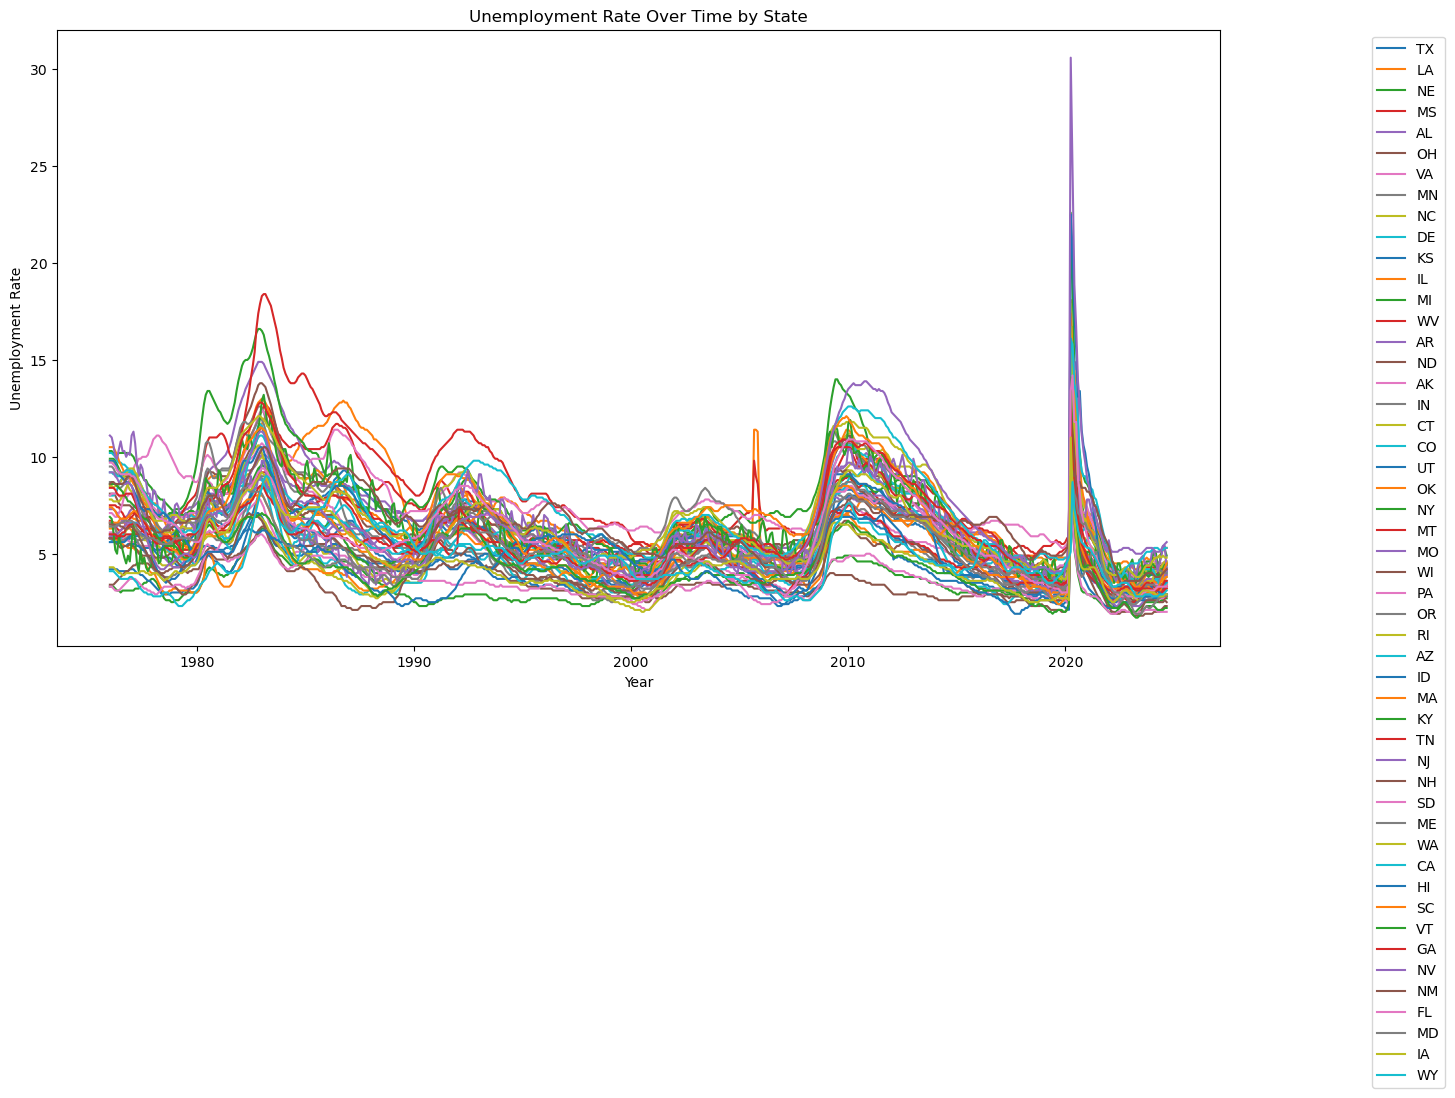


Unemployment Rate Summary by State:
           mean  median       std  min   max
State                                       
AK     7.605470     7.3  1.650603  3.8  11.8
AL     6.696410     6.3  2.661252  2.3  14.9
AR     6.088889     5.9  1.731278  2.8  10.1
AZ     6.130256     5.7  1.873661  3.3  13.8
CA     7.150769     6.8  2.196870  3.8  16.1
CO     5.235385     5.3  1.766089  2.4  11.7
CT     5.375726     5.1  1.865263  2.0  11.8
DE     5.309060     4.7  1.810993  2.8  13.4
FL     5.883419     5.6  2.153418  2.4  14.2
GA     5.808205     5.5  1.843008  3.0  12.4
HI     4.727863     4.5  2.149138  1.9  22.5
IA     4.463419     4.2  1.502223  2.5  11.0
ID     5.655043     5.5  1.871637  2.7  11.8
IL     6.772650     6.3  2.103105  3.6  18.1
IN     5.842564     5.3  2.383839  2.8  16.8
KS     4.508205     4.4  1.111337  2.5  12.1
KY     6.468889     5.8  2.117610  3.5  16.2
LA     6.897265     6.6  2.226773  3.3  13.5
MA     5.457094     5.1  1.967803  2.7  17.4
MD     5.128205   

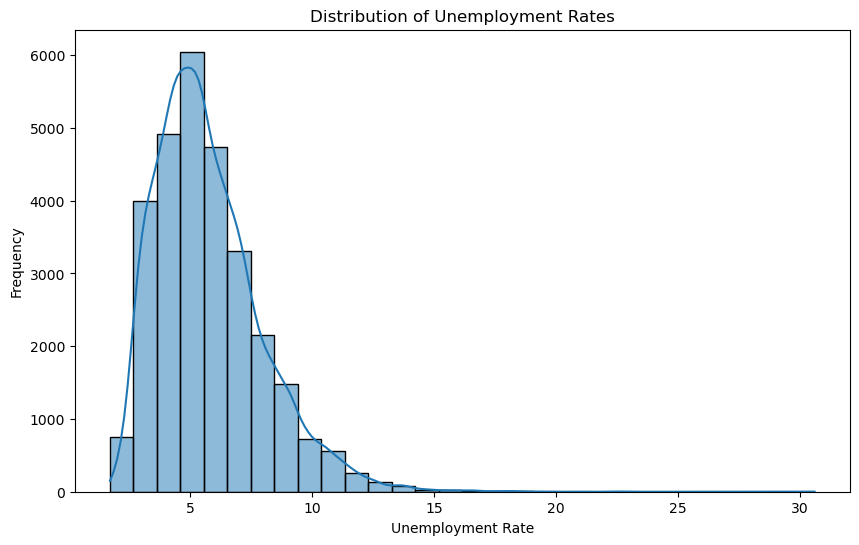

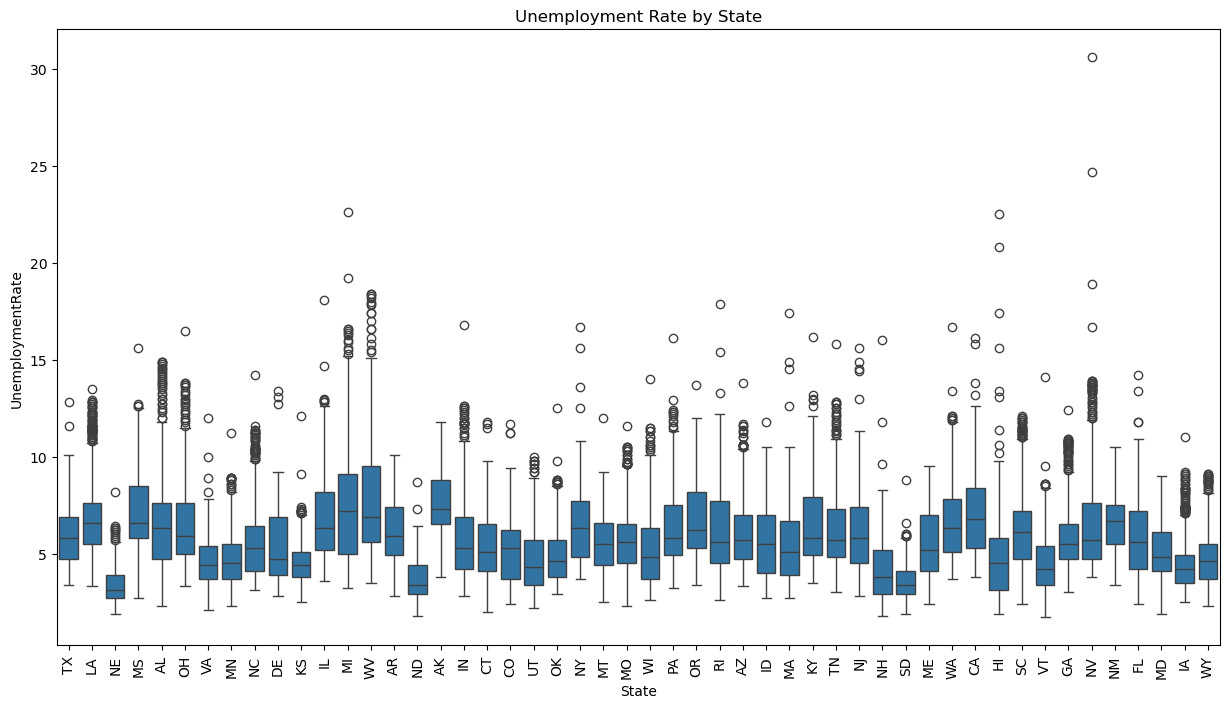

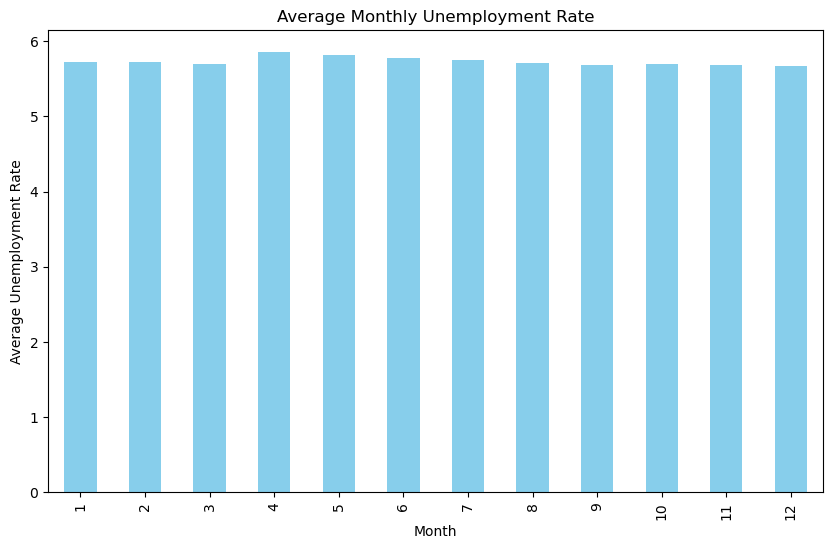

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('combined_data.csv')

data['DATE'] = pd.to_datetime(data['DATE'])

# Extract month and add it as a new column
data['month'] = data['DATE'].dt.month

# Extract year and add it as a new column 
data['year'] = data['DATE'].dt.year

# Set the date as the index
data.set_index('DATE', inplace=True)


# Basic Inspection
print("First few rows of the dataset:")
print(data.head())
print("\nSummary of the dataset:")
print(data.info())
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Handle missing values if any
data = data.fillna(method='ffill').fillna(method='bfill')

# Descriptive Statistics
print("\nDescriptive Statistics:")
print(data.describe())

# Time Series Analysis
# Plotting unemployment rate over time for all states
plt.figure(figsize=(15, 8))
for state in data['State'].unique():
    state_data = data[data['State'] == state]
    plt.plot(state_data.index, state_data['UnemploymentRate'], label=state)

plt.title('Unemployment Rate Over Time by State')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

# Aggregated statistics by state
state_summary = data.groupby('State')['UnemploymentRate'].agg(['mean', 'median', 'std', 'min', 'max'])
print("\nUnemployment Rate Summary by State:")
print(state_summary)

# Visualizations
# Distribution of unemployment rates
plt.figure(figsize=(10, 6))
sns.histplot(data['UnemploymentRate'], bins=30, kde=True)
plt.title('Distribution of Unemployment Rates')
plt.xlabel('Unemployment Rate')
plt.ylabel('Frequency')
plt.show()

# Boxplot by state
plt.figure(figsize=(15, 8))
sns.boxplot(x='State', y='UnemploymentRate', data=data)
plt.title('Unemployment Rate by State')
plt.xticks(rotation=90)
plt.show()

# Monthly trends
monthly_trends = data.groupby(data.index.month)['UnemploymentRate'].mean()
plt.figure(figsize=(10, 6))
monthly_trends.plot(kind='bar', color='skyblue')
plt.title('Average Monthly Unemployment Rate')
plt.xlabel('Month')
plt.ylabel('Average Unemployment Rate')
plt.show()


Filtered Data (first few rows):
            UnemploymentRate State  month  year
DATE                                           
2017-01-01               4.8    TX      1  2017
2017-02-01               4.7    TX      2  2017
2017-03-01               4.6    TX      3  2017
2017-04-01               4.5    TX      4  2017
2017-05-01               4.4    TX      5  2017

Descriptive Statistics:
       UnemploymentRate        month         year
count       4650.000000  4650.000000  4650.000000
mean           4.244344     6.354839  2020.387097
std            2.092023     3.407018     2.238867
min            1.700000     1.000000  2017.000000
25%            3.100000     3.000000  2018.000000
50%            3.800000     6.000000  2020.000000
75%            4.600000     9.000000  2022.000000
max           30.600000    12.000000  2024.000000


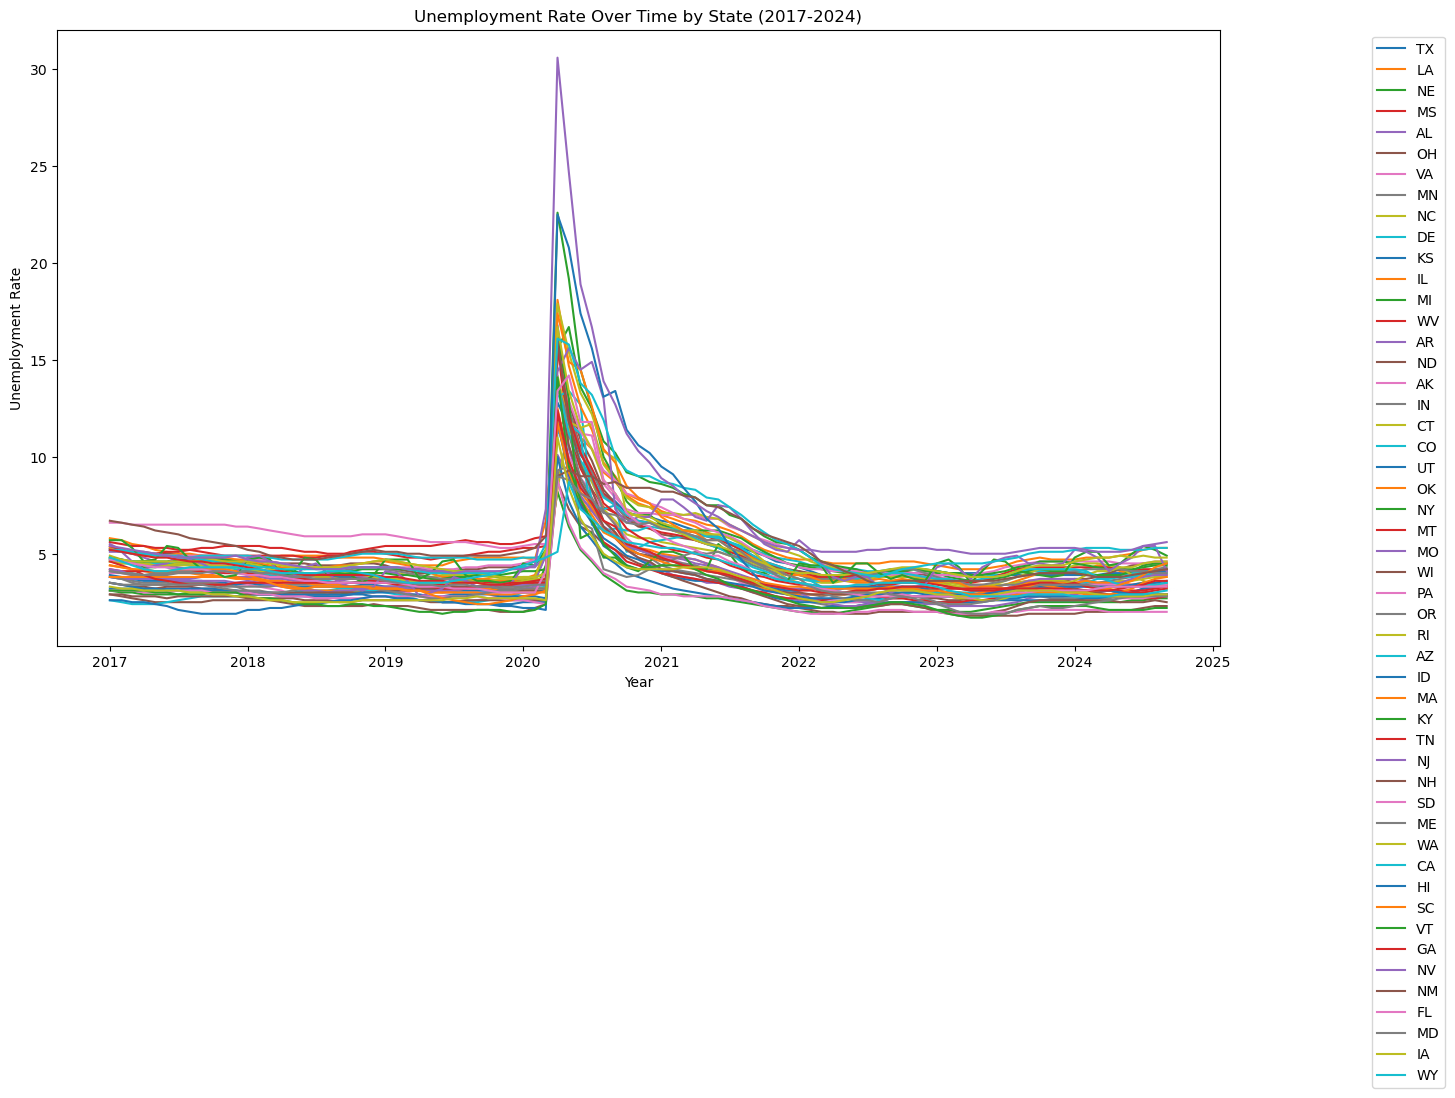

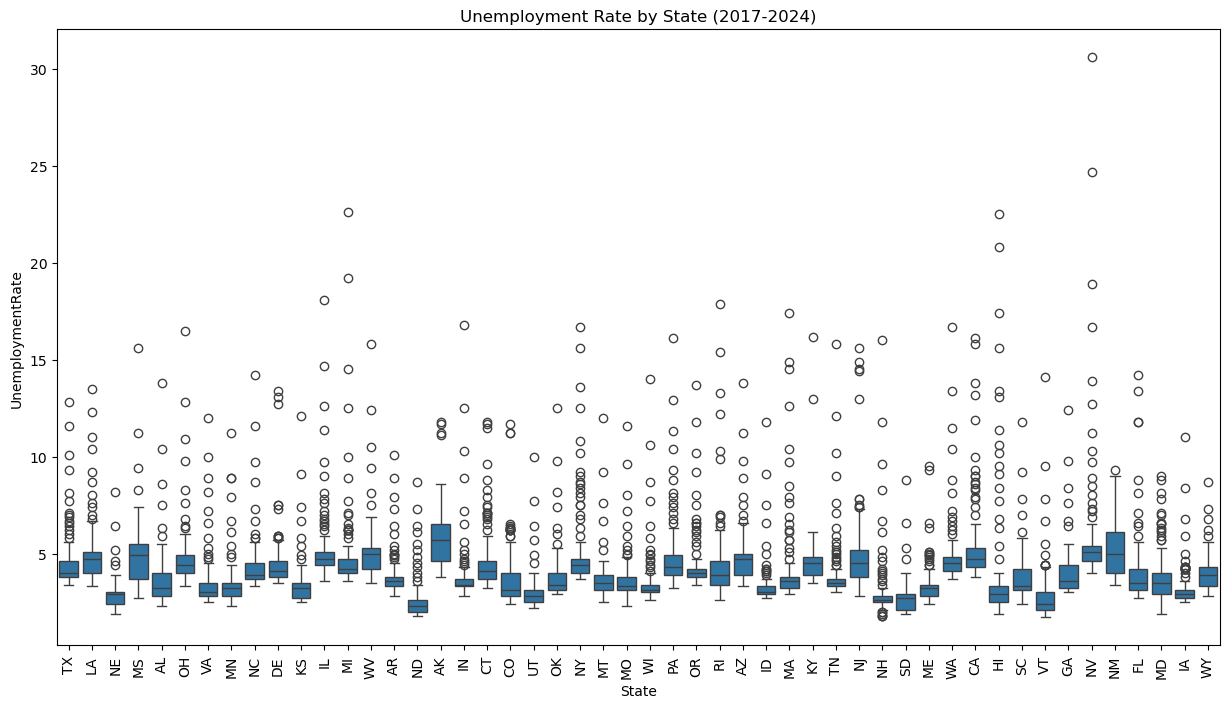

In [29]:
# Filter the dataset for years 2017 to 2024
filtered_data = data[(data['year'] >= 2017) & (data['year'] <= 2024)]

# Basic Inspection of Filtered Data
print("Filtered Data (first few rows):")
print(filtered_data.head())

# Descriptive Statistics for the Filtered Data
print("\nDescriptive Statistics:")
print(filtered_data.describe())

# Plotting Unemployment Rate Over Time for All States (2017-2024)
plt.figure(figsize=(15, 8))
for state in filtered_data['State'].unique():
    state_data = filtered_data[filtered_data['State'] == state]
    plt.plot(state_data.index, state_data['UnemploymentRate'], label=state)

plt.title('Unemployment Rate Over Time by State (2017-2024)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

# Boxplot of Unemployment Rate by State (2017-2024)
plt.figure(figsize=(15, 8))
sns.boxplot(x='State', y='UnemploymentRate', data=filtered_data)
plt.title('Unemployment Rate by State (2017-2024)')
plt.xticks(rotation=90)
plt.show()


In [21]:

# Convert 'Date' column to datetime
ur_df['DATE'] = pd.to_datetime(ur_df['DATE'])

# Filter for the past 30 years (since 1994 if the current year is 2024)
start_date = pd.to_datetime('1994-01-01')
filtered_df = ur_df[ur_df['DATE'] >= start_date]

# Group by 'State' and calculate the average unemployment rate
result_df = filtered_df.groupby('State').agg(
    average_unemployment_rate=('UnemploymentRate', 'mean')
).reset_index()

print(result_df)


   State  average_unemployment_rate
0     AK                   6.688618
1     AL                   5.526016
2     AR                   5.198916
3     AZ                   5.732249
4     CA                   6.929810
5     CO                   4.751491
6     CT                   5.303523
7     DE                   4.913821
8     FL                   5.275881
9     GA                   5.565583
10    HI                   4.563144
11    IA                   3.867209
12    ID                   4.925474
13    IL                   6.185095
14    IN                   5.123577
15    KS                   4.472900
16    KY                   5.851762
17    LA                   5.813008
18    MA                   5.033604
19    MD                   4.796748
20    ME                   4.936314
21    MI                   6.406775
22    MN                   4.249322
23    MO                   5.154472
24    MS                   6.367751
25    MT                   4.741192
26    NC                   5

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      50 non-null     object 
 1   average_unemployment_rate  50 non-null     float64
dtypes: float64(1), object(1)
memory usage: 932.0+ bytes
None


Basic Statistics:
       average_unemployment_rate
count                  50.000000
mean                    5.195772
std                     0.940634
min                     3.043360
25%                     4.597087
50%                     5.289702
75%                     5.871883
max                     6.929810


First Few Rows:
  State  average_unemployment_rate
0    AK                   6.688618
1    AL                   5.526016
2    AR                   5.198916
3    AZ                   5.732249
4    CA                   6.929810




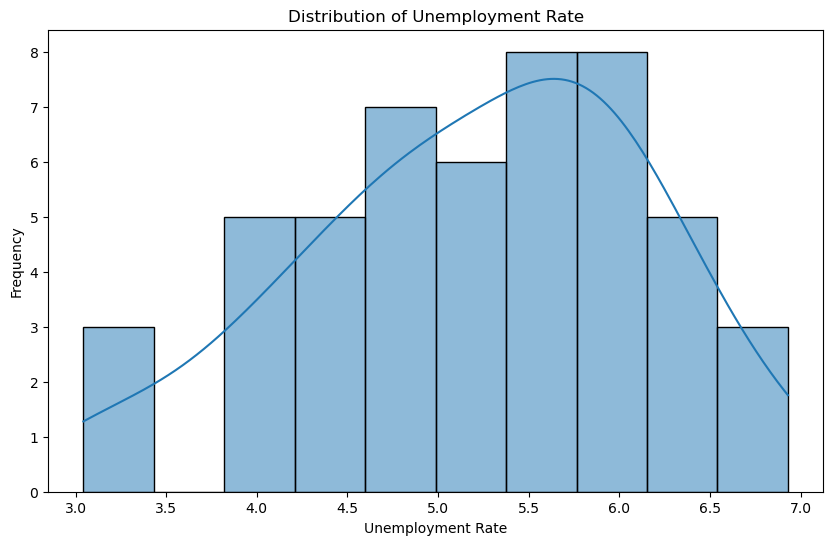

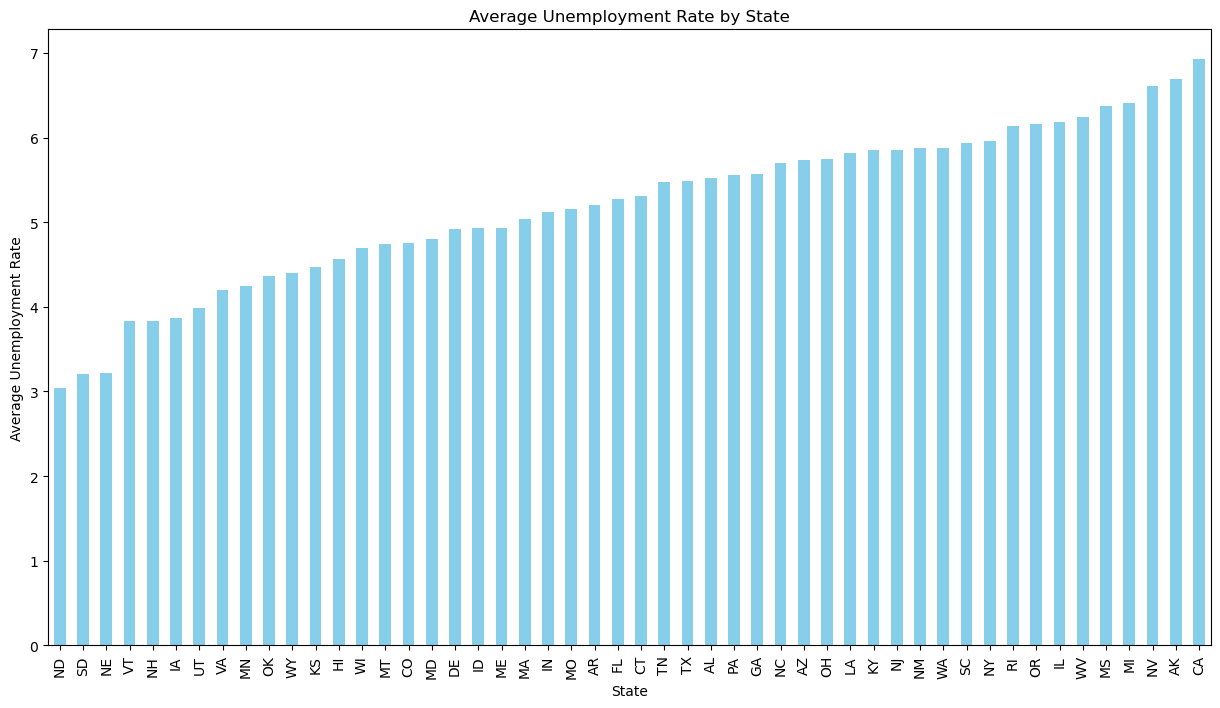

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic information about the DataFrame
print("Basic Information:")
print(result_df.info())
print("\n")

# Display basic statistics
print("Basic Statistics:")
print(result_df.describe())
print("\n")

# Display first few rows of the DataFrame
print("First Few Rows:")
print(result_df.head())
print("\n")

# Univariate Analysis: Distribution of Unemployment Rate
plt.figure(figsize=(10, 6))
sns.histplot(result_df['average_unemployment_rate'], bins=10, kde=True)
plt.title('Distribution of Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Frequency')
plt.show()

# Bar Plot of Average Unemployment Rate by State
plt.figure(figsize=(15, 8))
average_unemployment_by_state = result_df.groupby('State')['average_unemployment_rate'].mean().sort_values()
average_unemployment_by_state.plot(kind='bar', color='skyblue')
plt.title('Average Unemployment Rate by State')
plt.xlabel('State')
plt.ylabel('Average Unemployment Rate')
plt.xticks(rotation=90)
plt.show()


In [47]:
climate_df = pd.read_csv('climate_by_state_more_vars.csv')

# filter out specific states
states_to_remove = ['Chuuk', 'Guam', 'Rālik', 'Yap']
climate_df = climate_df[~climate_df['STATE'].isin(states_to_remove)]

# dictionary to map state abbreviations to full names, this was really annoying 
state_mapping = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}

# make col name match
climate_df['State'] = climate_df['STATE'].map({v: k for k, v in state_mapping.items()})

unemployment_df = pd.read_csv('combined_data.csv')

# get month 
unemployment_df['DATE'] = pd.to_datetime(unemployment_df['DATE'])
unemployment_df['year'] = unemployment_df['DATE'].dt.year
unemployment_df['month'] = unemployment_df['DATE'].dt.month

# filter for the years 1991 to 2019 because of COVID
filtered_df = unemployment_df[(unemployment_df['year'] >= 1991) & (unemployment_df['year'] <= 2019)]

# avg for month 
average_unemployment = filtered_df.groupby(['State', 'month'])['UnemploymentRate'].mean().reset_index()

# merge
merged_df = pd.merge(climate_df, average_unemployment[['State', 'month', 'UnemploymentRate']], on=['State', 'month'], how='inner')

merged_df.to_csv('merged_climate_unemployment.csv', index=False)
